# Az intercepció hatása a növényzet számára hasznosítható csapadék mértékének alakulására

Az erdei fák számára felvehető csapadék mértékét jelentősen befolyásolja az a vízmennyiség, amit a lombfelület megköt és újra elpárologtat anélkül, hogy az elérhetné a talajfelszínt. Hazai környezetben fenyő esetén a talajfelszínen található vastag száraz tűavar ezt a hatás jelentősen fokozhatja. Az élő lomb és a száraz avar együttes hatásaként visszatartott csapadékmennyiség elérheti az 5-10 mm mértéket, ami sok esetben a teljes csapadékesemény 30-50%-át is jelentheti.

<img src="https://github.com/jsheperd/forest_water/blob/master/img/csapadek.png?raw=true" width="300" height="300" />

### Hipotézis

A növényzet számára felvehető csapadék alakulását nem csak az éves csapadékösszeg befolyásolja, de az eloszlási mintázat is meghatározó. A modellezhetőség szempontjából a legfontosabb tényezők a lombfelület aktuális nagysága, valamint az adott csapdékesemény mértéke mm-ben. A felszíni elfolyást és a mélybeszivárgást első vizsgálatainkban nem vesszük figyelembe, mert azok modellezéséhez további domborzati és talajtani paraméterek is szükségesek.

### Felhasznált adatok

Az [Országos meteorológia Szolgálat 1901-2010 éghajalati adasorai](http://www.met.hu/eghajlat/magyarorszag_eghajlata/eghajlati_adatsorok/) napi csapdékeseményeket is tartalmaznak, ami alkalmas arra, hogy becsléseket tegyünk az aktuális csapadékesemény intercepciós veszteségére 110 éves időszakra vonatkozóan.

In [1]:
%matplotlib inline

# Basic configurations
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')

# define source
dfSrc = 'https://raw.githubusercontent.com/jsheperd/forest_water/master/data/SZO_d.txt'
Src = u'Szombathely'

# load data
dfPrec = pd.read_csv(dfSrc, sep=';', parse_dates=['#datum'], date_parser=lambda x: pd.datetime.strptime(x, '%Y-%m-%d'))
dfPrec.set_index(dfPrec['#datum'])

print Src, u'adatai betöltve'

Szombathely adatai betöltve


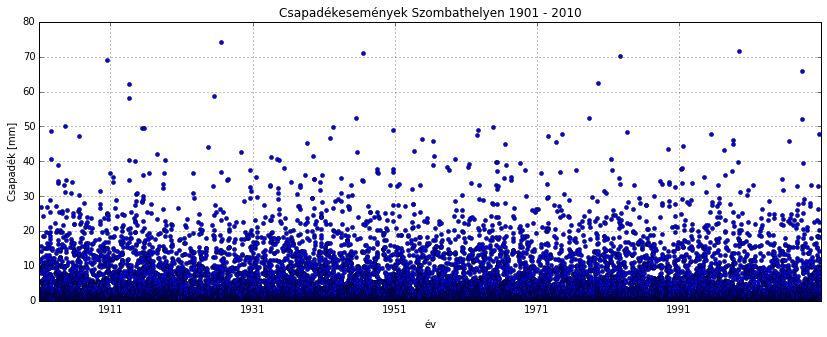

In [2]:
fig, ax = plt.subplots(figsize=(14, 5))
#plt.yscale('log')
plt.plot_date(dfPrec['#datum'], dfPrec['d_rs'], ms=4)
plt.ylabel(u'Csapadék [mm]')
plt.xlabel(u'év')
plt.title(u'Csapadékesemények %sen 1901 - 2010' % Src)
plt.grid(True)

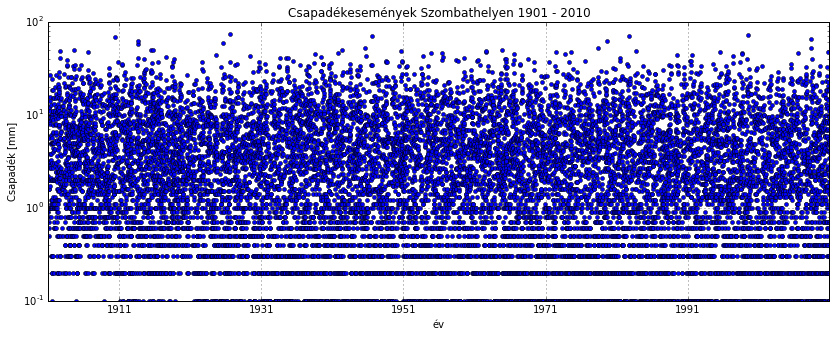

In [3]:
fig, ax = plt.subplots(figsize=(14, 5))
plt.yscale('log')
plt.plot_date(dfPrec['#datum'], dfPrec['d_rs'], ms=4)
plt.ylabel(u'Csapadék [mm]')
plt.xlabel(u'év')
plt.title(u'Csapadékesemények %sen 1901 - 2010' % Src)
plt.grid(True)

In [4]:
# Interception
import math

# Intercepciós veszteség
def makeInterceptor(capacity):
    return lambda p: capacity*(1-math.exp(-p/capacity))

I = aktuális intercepció
C = benedvesedési kapacitás
P = csapadék nagysága
[Merriam, R.A, 1960 A note on the interception lass egnation. I. Geophys., 65:3850p-3851p]


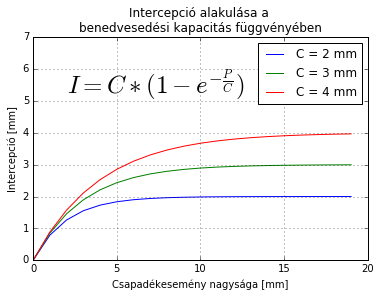

In [5]:
# Show Interception
p = range(0, 20, 1)
c2 = map(makeInterceptor(2.0), p)
c3 = map(makeInterceptor(3.0), p)
c4 = map(makeInterceptor(4.0), p)

df = pd.DataFrame({'P': p, 'C2': c2, 'C3': c3, 'C4': c4})
#df['C'] = df['P'].apply(p10)
plt.plot(df['P'], df['C2'], label="C = 2 mm")
plt.plot(df['P'], df['C3'], label="C = 3 mm")
plt.plot(df['P'], df['C4'], label="C = 4 mm")
plt.legend()
plt.xlabel(u'Csapadékesemény nagysága [mm]')
plt.ylabel(u'Intercepció [mm]')
plt.gca().set_ylim([0,7])
plt.gca().annotate(r'$I = C*( 1 - e^{- \frac{P}{C}})$', xy=(2, 5.2), fontsize=25)
plt.grid(True)
plt.title(u'Intercepció alakulása a \nbenedvesedési kapacitás függvényében')
print u'I = aktuális intercepció'
print u'C = benedvesedési kapacitás'
print u'P = csapadék nagysága'
print u'[Merriam, R.A, 1960 A note on the interception lass egnation. I. Geophys., 65:3850p-3851p]'

<__main__.scalableHist instance at 0x000000000AFD9FC8>

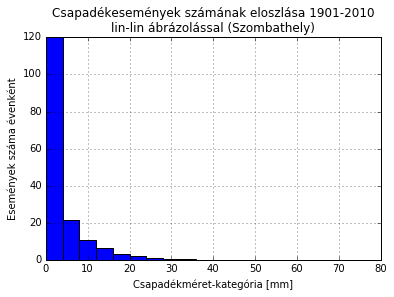

In [29]:
# Calculate interception, usable precipitation
class scalableHist:
    def __init__(self, col, bins=20, title=''):
        self.col = col
        self.bins = bins
        self.title = title
        (self.hist, self.bins) = np.histogram(col, bins=self.bins, range=(0, 80))
        self.center = (self.bins[1:] + self.bins[:-1]) / 2.0
        self.width = self.bins[1] - self.bins[0]
                
    def scale(self, factor):
        self.hist = self.hist * factor
        return self
        
    def plot(self, logy=False, xlabel=None, ylabel=None):
        plt.grid()
        plt.bar(self.center, self.hist, align='center', width=self.width)
        if self.title:
            plt.title(self.title)
        if logy:
            plt.yscale('log')
        if xlabel:
            plt.xlabel(xlabel)
        if ylabel:
            plt.ylabel(ylabel)
        return self

    
title = u'Csapadékesemények számának eloszlása 1901-2010\nlin-lin ábrázolással (%s)' % Src
ylabel = u'Események száma évenként'
xlabel = u'Csapadékméret-kategória [mm]'
dfEventNum = dfPrec[dfPrec.d_rs.notnull()]
s1 = scalableHist(dfEventNum.d_rs, title=title).scale(1/110.0)
s1.plot(xlabel=xlabel, ylabel=ylabel)

<__main__.scalableHist instance at 0x000000000AFD9FC8>

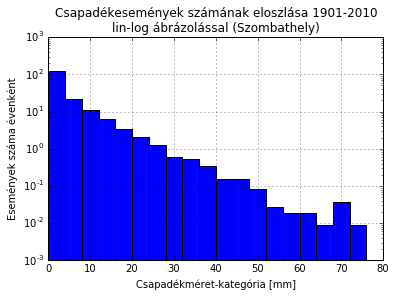

In [30]:
s1.title = u'Csapadékesemények számának eloszlása 1901-2010\nlin-log ábrázolással (%s)' % Src
s1.plot(True, xlabel=xlabel, ylabel=ylabel)

In [38]:
# intercepciós veszteség számítása eseményenként
dfPrec['c2'] = map(makeInterceptor(2.0), dfPrec.d_rs)
dfPrec['c3'] = map(makeInterceptor(3.0), dfPrec.d_rs)
dfPrec['c4'] = map(makeInterceptor(4.0), dfPrec.d_rs)

# hasznosítható csapadék
dfPrec['h2'] = dfPrec.d_rs - dfPrec.c2
dfPrec['h3'] = dfPrec.d_rs - dfPrec.c3
dfPrec['h4'] = dfPrec.d_rs - dfPrec.c4

dfPrec['Year'] = map(lambda d: d.year, dfPrec['#datum'])
dfPrec['Decad'] = map(lambda d: 1+((d.year-1)/10)*10, dfPrec['#datum'])

dfPrec['Month'] = map(lambda d: d.month, dfPrec['#datum'])
dfPrec['Vegetation'] = map(lambda d: ((5<=d.month) & (d.month<=10)), dfPrec['#datum'])

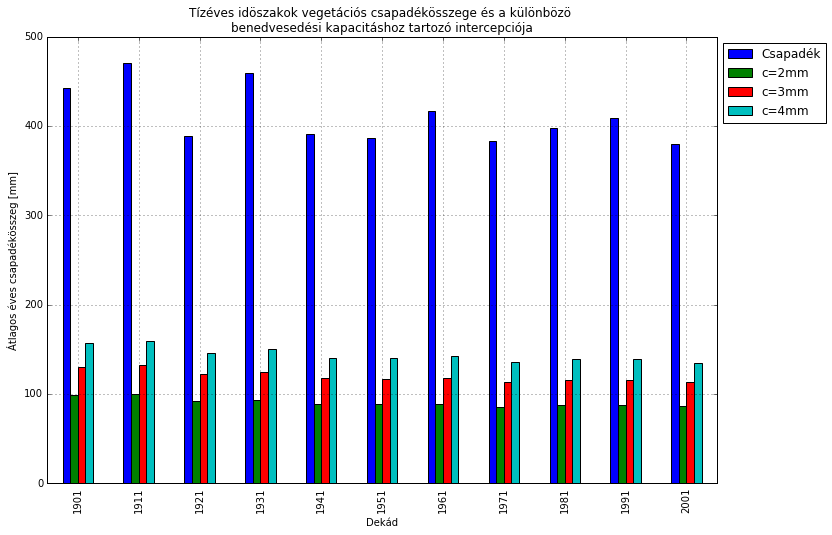

In [63]:
#Vegetációs időszak cspadékeseményei
dfVeg = dfPrec[dfPrec.Vegetation]
dfModPrec = dfVeg.groupby(['Decad'])['d_rs', 'c2', 'c3', 'c4'].sum()
# Tízéves átlag képzése
dfModPrec.d_rs /= 10.0
dfModPrec.c2 /= 10.0
dfModPrec.c3 /= 10.0
dfModPrec.c4 /= 10.0

dfModPrec.plot(kind='bar', figsize=(12, 8))
plt.title(u'Tízéves idöszakok vegetációs csapadékösszege és a különbözö \nbenedvesedési kapacitáshoz tartozó intercepciója')
plt.xlabel(u'Dekád')
plt.ylabel(u'Átlagos éves csapadékösszeg [mm]')
plt.legend(loc="upper left", bbox_to_anchor=(1,1), labels=[u'Csapadék', 'c=2mm', 'c=3mm', 'c=4mm'])
plt.grid(True)

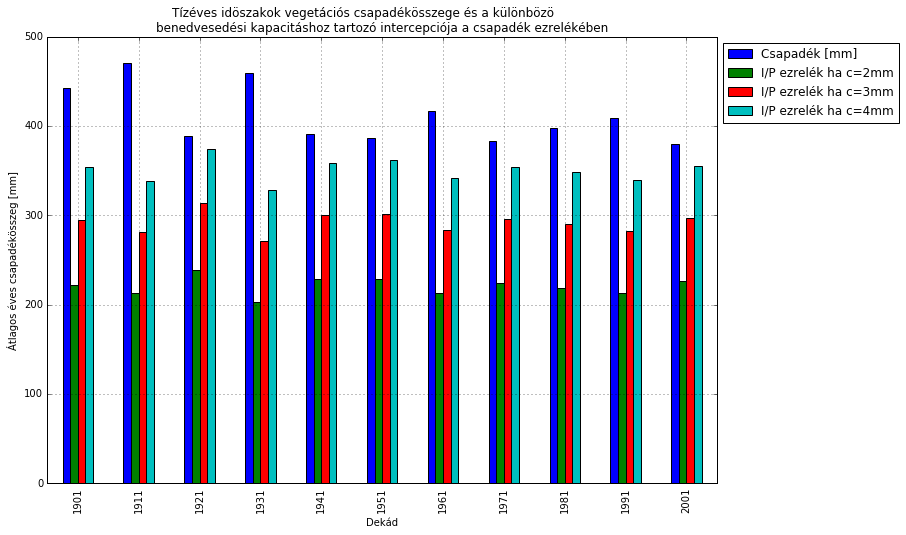

In [70]:
dfModPrec['r2'] = 1000* dfModPrec.c2 / dfModPrec.d_rs
dfModPrec['r3'] = 1000* dfModPrec.c3 / dfModPrec.d_rs
dfModPrec['r4'] = 1000* dfModPrec.c4 / dfModPrec.d_rs

dfModPrec[['d_rs', 'r2', 'r3', 'r4']].plot(kind='bar', figsize=(12, 8))
plt.title(u'Tízéves idöszakok vegetációs csapadékösszege és a különbözö\
          \nbenedvesedési kapacitáshoz tartozó intercepciója a csapadék ezrelékében')
plt.xlabel(u'Dekád')
plt.ylabel(u'Átlagos éves csapadékösszeg [mm]')
plt.legend(loc="upper left", bbox_to_anchor=(1,1), 
           labels=[u'Csapadék [mm]', u'I/P ezrelék ha c=2mm', u'I/P ezrelék ha c=3mm', u'I/P ezrelék ha c=4mm'])
plt.grid(True)